# FSL - Brain Extraction Tool(BET) Quality Check 
This script was created when the BET performed realy poorly on subjects of ABIDE. It is a very simple script that does the following:
* Read the brain nifti files using the bash's find command and save it to a file as -
```
find . -name "sub-*.nii.gz" > filename.txt
```
* Read the file to extract all the filenames.
* Count the number of brain voxels in each nifti file.
* Then find the number of brains whose number brain voxels are some specific standard deviations away from the mean.

I used another metric that didn't work
* Count the voxels that doesnot lie inside the standard mask.
- This didn't work as ater the transformation to the standard space the brains were totally skewed but lied inside the standard mask.

In [ ]:
import numpy as np
import subprocess
import os
from os.path import join as opj
import re
import nibabel as nib

In [56]:
# paths = np.genfromtxt('/home1/varunk/results_again_again/anat_file_paths.txt', dtype='str') #Didn't work

# paths = np.genfromtxt('/home1/varunk/results_again_again/skullstrip_anat.txt', dtype='str') 

paths = np.genfromtxt('/home1/varunk/results_again_again/bet_resample_reg_brain_paths.txt', dtype='str')

# paths = np.genfromtxt('/home1/varunk/results_again_again/bet_resample_brain_paths.txt', dtype='str')
paths = np.sort(paths)
save_destination = '/home1/varunk/results_again_again/registered_anat_qc/'
if not os.path.exists(save_destination):
    os.mkdir(save_destination)
    
os.chdir(save_destination)

In [57]:
# print(np.sort(paths)[0:10])
paths

array([ './_subject_id_0050002/anat2std_reg/sub-0050002_T1w_brain_resample_flirt.nii',
       './_subject_id_0050003/anat2std_reg/sub-0050003_T1w_brain_resample_flirt.nii',
       './_subject_id_0050004/anat2std_reg/sub-0050004_T1w_brain_resample_flirt.nii',
       ...,
       './_subject_id_0051585/anat2std_reg/sub-0051585_T1w_brain_resample_flirt.nii',
       './_subject_id_0051606/anat2std_reg/sub-0051606_T1w_brain_resample_flirt.nii',
       './_subject_id_0051607/anat2std_reg/sub-0051607_T1w_brain_resample_flirt.nii'],
      dtype='<U75')

### Metric:  Number of non zero voxels (Brain Voxels)

In [59]:
# paths = paths[0:3]
res_voxels = []
for path in paths:
    base_dir = '/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg'
    anat_path = base_dir + path[1:]
    print(anat_path)
    sub_id_extracted = re.search('.+_subject_id_(\d+)', anat_path).group(1)
#     out_file = 'sub_' + sub_id_extracted + '_residual'
    
    res_file = opj(os.getcwd(),out_file)
    proc = subprocess.Popen(['fslstats', anat_path, '-V'], 
                             stdout=subprocess.PIPE)
    voxels = int((proc.communicate()[0]).decode("utf-8").split(' ')[0])
    res_voxels.append(voxels)

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050002/anat2std_reg/sub-0050002_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050003/anat2std_reg/sub-0050003_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050004/anat2std_reg/sub-0050004_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050005/anat2std_reg/sub-0050005_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050006/anat2std_reg/sub-0050006_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050007/anat2std_reg/sub-0050007_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050056/anat2std_reg/sub-0050056_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050057/anat2std_reg/sub-0050057_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050058/anat2std_reg/sub-0050058_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050059/anat2std_reg/sub-0050059_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050060/anat2std_reg/sub-0050060_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050102/anat2std_reg/sub-0050102_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050155/anat2std_reg/sub-0050155_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050156/anat2std_reg/sub-0050156_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050157/anat2std_reg/sub-0050157_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050158/anat2std_reg/sub-0050158_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050159/anat2std_reg/sub-0050159_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050160/anat2std_reg/sub-0050160_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050232/anat2std_reg/sub-0050232_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050233/anat2std_reg/sub-0050233_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050234/anat2std_reg/sub-0050234_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050235/anat2std_reg/sub-0050235_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050236/anat2std_reg/sub-0050236_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050237/anat2std_reg/sub-0050237_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050286/anat2std_reg/sub-0050286_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050287/anat2std_reg/sub-0050287_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050288/anat2std_reg/sub-0050288_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050289/anat2std_reg/sub-0050289_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050290/anat2std_reg/sub-0050290_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050291/anat2std_reg/sub-0050291_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050343/anat2std_reg/sub-0050343_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050344/anat2std_reg/sub-0050344_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050345/anat2std_reg/sub-0050345_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050346/anat2std_reg/sub-0050346_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050347/anat2std_reg/sub-0050347_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050348/anat2std_reg/sub-0050348_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050406/anat2std_reg/sub-0050406_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050407/anat2std_reg/sub-0050407_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050408/anat2std_reg/sub-0050408_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050410/anat2std_reg/sub-0050410_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050411/anat2std_reg/sub-0050411_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050412/anat2std_reg/sub-0050412_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050463/anat2std_reg/sub-0050463_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050464/anat2std_reg/sub-0050464_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050465/anat2std_reg/sub-0050465_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050466/anat2std_reg/sub-0050466_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050467/anat2std_reg/sub-0050467_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050468/anat2std_reg/sub-0050468_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050520/anat2std_reg/sub-0050520_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050521/anat2std_reg/sub-0050521_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050522/anat2std_reg/sub-0050522_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050523/anat2std_reg/sub-0050523_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050524/anat2std_reg/sub-0050524_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050525/anat2std_reg/sub-0050525_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050612/anat2std_reg/sub-0050612_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050613/anat2std_reg/sub-0050613_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050614/anat2std_reg/sub-0050614_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050615/anat2std_reg/sub-0050615_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050616/anat2std_reg/sub-0050616_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050617/anat2std_reg/sub-0050617_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050693/anat2std_reg/sub-0050693_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050694/anat2std_reg/sub-0050694_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050695/anat2std_reg/sub-0050695_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050696/anat2std_reg/sub-0050696_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050697/anat2std_reg/sub-0050697_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050698/anat2std_reg/sub-0050698_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050756/anat2std_reg/sub-0050756_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050757/anat2std_reg/sub-0050757_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050772/anat2std_reg/sub-0050772_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050773/anat2std_reg/sub-0050773_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050774/anat2std_reg/sub-0050774_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050775/anat2std_reg/sub-0050775_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050824/anat2std_reg/sub-0050824_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050825/anat2std_reg/sub-0050825_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050826/anat2std_reg/sub-0050826_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050952/anat2std_reg/sub-0050952_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050953/anat2std_reg/sub-0050953_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050954/anat2std_reg/sub-0050954_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051006/anat2std_reg/sub-0051006_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051007/anat2std_reg/sub-0051007_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051008/anat2std_reg/sub-0051008_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051009/anat2std_reg/sub-0051009_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051010/anat2std_reg/sub-0051010_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051011/anat2std_reg/sub-0051011_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051066/anat2std_reg/sub-0051066_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051067/anat2std_reg/sub-0051067_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051068/anat2std_reg/sub-0051068_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051069/anat2std_reg/sub-0051069_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051070/anat2std_reg/sub-0051070_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051071/anat2std_reg/sub-0051071_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051122/anat2std_reg/sub-0051122_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051123/anat2std_reg/sub-0051123_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051124/anat2std_reg/sub-0051124_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051125/anat2std_reg/sub-0051125_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051126/anat2std_reg/sub-0051126_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051127/anat2std_reg/sub-0051127_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051182/anat2std_reg/sub-0051182_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051183/anat2std_reg/sub-0051183_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051184/anat2std_reg/sub-0051184_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051185/anat2std_reg/sub-0051185_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051186/anat2std_reg/sub-0051186_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051187/anat2std_reg/sub-0051187_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051241/anat2std_reg/sub-0051241_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051248/anat2std_reg/sub-0051248_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051249/anat2std_reg/sub-0051249_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051250/anat2std_reg/sub-0051250_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051251/anat2std_reg/sub-0051251_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051252/anat2std_reg/sub-0051252_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051314/anat2std_reg/sub-0051314_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051315/anat2std_reg/sub-0051315_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051316/anat2std_reg/sub-0051316_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051317/anat2std_reg/sub-0051317_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051318/anat2std_reg/sub-0051318_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051319/anat2std_reg/sub-0051319_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051367/anat2std_reg/sub-0051367_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051368/anat2std_reg/sub-0051368_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051369/anat2std_reg/sub-0051369_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051370/anat2std_reg/sub-0051370_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051371/anat2std_reg/sub-0051371_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051372/anat2std_reg/sub-0051372_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051565/anat2std_reg/sub-0051565_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051566/anat2std_reg/sub-0051566_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051567/anat2std_reg/sub-0051567_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051568/anat2std_reg/sub-0051568_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051569/anat2std_reg/sub-0051569_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0051570/anat2std_reg/sub-0051570_T1w_brain_resample_flirt.nii
/home1/varunk/results_again_again/ABIDE1_Preprocess/

In [60]:
res_voxels

[97362,
 98716,
 97542,
 98420,
 98347,
 96888,
 96754,
 93772,
 99805,
 98155,
 99651,
 99023,
 97042,
 101026,
 97742,
 98422,
 95568,
 99412,
 97610,
 99149,
 97180,
 99239,
 99659,
 102015,
 96787,
 97593,
 97299,
 96577,
 98992,
 99909,
 98553,
 97816,
 100452,
 99676,
 100093,
 97328,
 96987,
 95533,
 97746,
 98989,
 97918,
 97622,
 100631,
 98133,
 99137,
 101178,
 95751,
 98419,
 97022,
 98084,
 100148,
 99345,
 101624,
 100359,
 101287,
 98342,
 98021,
 99759,
 98877,
 96135,
 99294,
 96480,
 94880,
 97985,
 97009,
 97874,
 99388,
 96516,
 99323,
 95827,
 98824,
 99205,
 96564,
 96120,
 99385,
 98029,
 97254,
 96780,
 95306,
 96409,
 96437,
 100104,
 99283,
 98682,
 101997,
 95210,
 94665,
 93714,
 98445,
 97135,
 100482,
 94106,
 98242,
 95455,
 97185,
 98368,
 97564,
 95032,
 98521,
 96105,
 97778,
 97634,
 97244,
 97836,
 97411,
 97511,
 97078,
 98734,
 98361,
 97224,
 95933,
 97152,
 97283,
 97865,
 96857,
 98135,
 97855,
 98891,
 97440,
 97287,
 97400,
 88592,
 89872,
 84

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   2.,   7.,   3.,   3.,   9.,  14.,  11.,  15.,  18.,  22.,
         21.,  24.,  16.,  24.,  36.,  31.,  35.,  22.,  38.,  36.,  38.,
         31.,  35.,  45.,  38.,  46.,  50.,  53.,  48.,  59.,  58.,  53.,
         40.,  36.,  25.,  15.,  11.,   9.,   5.,   5.,   2.,   2.,   1.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 70895,  71395,  71895,  72395,  72895,  73395,  73895,  74395,
         74895,  75395,  75895,  76395,  76895,  77395,  77895,  78395,
         78895,  79395,  79895,  80395,  80895,  81395,  81895,  82395,
         82895,  83395,  83895,  84395,  84895,  85395,  85895,  86395,
         86895,  87395,  87895,  88395,  88895,  89395,  89895,  90395,
         90895,  91395,  91895,  92395,  92895,  93395,  9

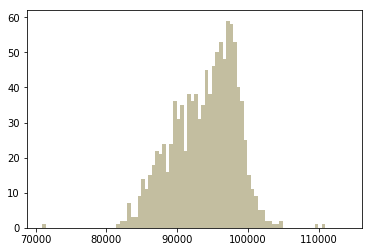

In [63]:
bins = np.arange(min(res_voxels), max(res_voxels), 500) # fixed bin size

res = plt.hist(res_voxels, 
         bins=bins, 
         alpha=0.5, 
         color='#887E43',
         label='Defender')

In [64]:
np.mean(res_voxels),np.std(res_voxels)

(93886.246823956448, 4524.2092165666572)

In [66]:
#number_of_outliers = 
(res_voxels > 10.0*np.std(res_voxels)).sum()

1102

In [68]:
paths[np.where((res_voxels > 20.0*np.std(res_voxels)) == True)]

array([ './_subject_id_0050002/anat2std_reg/sub-0050002_T1w_brain_resample_flirt.nii',
       './_subject_id_0050003/anat2std_reg/sub-0050003_T1w_brain_resample_flirt.nii',
       './_subject_id_0050004/anat2std_reg/sub-0050004_T1w_brain_resample_flirt.nii',
       './_subject_id_0050005/anat2std_reg/sub-0050005_T1w_brain_resample_flirt.nii',
       './_subject_id_0050006/anat2std_reg/sub-0050006_T1w_brain_resample_flirt.nii',
       './_subject_id_0050007/anat2std_reg/sub-0050007_T1w_brain_resample_flirt.nii',
       './_subject_id_0050008/anat2std_reg/sub-0050008_T1w_brain_resample_flirt.nii',
       './_subject_id_0050009/anat2std_reg/sub-0050009_T1w_brain_resample_flirt.nii',
       './_subject_id_0050010/anat2std_reg/sub-0050010_T1w_brain_resample_flirt.nii',
       './_subject_id_0050011/anat2std_reg/sub-0050011_T1w_brain_resample_flirt.nii',
       './_subject_id_0050012/anat2std_reg/sub-0050012_T1w_brain_resample_flirt.nii',
       './_subject_id_0050013/anat2std_reg/sub-005001

In [23]:
np.mean(res_voxels),np.std(res_voxels)

(64565.743194192379, 7832.0396289753444)

In [76]:
#number_of_outliers = 
s = 3
(res_voxels > np.mean(res_voxels) + s*np.std(res_voxels)).sum(), (res_voxels < np.mean(res_voxels) - s*np.std(res_voxels)).sum()

(3, 1)

In [25]:
# index of outliers
np.where((res_voxels > 6.0*np.std(res_voxels)) == True)

(array([   0,    1,    2, ..., 1099, 1100, 1101]),)

In [27]:
# Subjects that are outliers
paths[np.where((res_voxels > 15.0*np.std(res_voxels)) == True)]

array(['./_subject_id_0050694/resample_anat/sub-0050694_T1w_brain_resample.nii',
       './_subject_id_0050697/resample_anat/sub-0050697_T1w_brain_resample.nii',
       './_subject_id_0051263/resample_anat/sub-0051263_T1w_brain_resample.nii',
       './_subject_id_0051296/resample_anat/sub-0051296_T1w_brain_resample.nii'],
      dtype='<U70')

In [49]:
# Subjects that are outliers
set(paths[np.where((res_voxels > 12.0*np.std(res_voxels)) == True)])

{'./_subject_id_0050694/resample_anat/sub-0050694_T1w_brain_resample.nii',
 './_subject_id_0050697/resample_anat/sub-0050697_T1w_brain_resample.nii',
 './_subject_id_0050746/resample_anat/sub-0050746_T1w_brain_resample.nii',
 './_subject_id_0051263/resample_anat/sub-0051263_T1w_brain_resample.nii',
 './_subject_id_0051296/resample_anat/sub-0051296_T1w_brain_resample.nii',
 './_subject_id_0051312/resample_anat/sub-0051312_T1w_brain_resample.nii'}

In [53]:
# Subjects that are outliers
set(paths[np.where((res_voxels > 11.0*np.std(res_voxels)) == True)]) -  set(paths[np.where((res_voxels > 12.0*np.std(res_voxels)) == True)])

{'./_subject_id_0050603/resample_anat/sub-0050603_T1w_brain_resample.nii',
 './_subject_id_0050626/resample_anat/sub-0050626_T1w_brain_resample.nii'}

In [54]:
set(paths[np.where((res_voxels > 10.0*np.std(res_voxels)) == True)]) - set(paths[np.where((res_voxels > 11.0*np.std(res_voxels)) == True)])

{'./_subject_id_0050007/resample_anat/sub-0050007_T1w_brain_resample.nii',
 './_subject_id_0050011/resample_anat/sub-0050011_T1w_brain_resample.nii',
 './_subject_id_0050016/resample_anat/sub-0050016_T1w_brain_resample.nii',
 './_subject_id_0050019/resample_anat/sub-0050019_T1w_brain_resample.nii',
 './_subject_id_0050132/resample_anat/sub-0050132_T1w_brain_resample.nii',
 './_subject_id_0050136/resample_anat/sub-0050136_T1w_brain_resample.nii',
 './_subject_id_0050239/resample_anat/sub-0050239_T1w_brain_resample.nii',
 './_subject_id_0050244/resample_anat/sub-0050244_T1w_brain_resample.nii',
 './_subject_id_0050432/resample_anat/sub-0050432_T1w_brain_resample.nii',
 './_subject_id_0050489/resample_anat/sub-0050489_T1w_brain_resample.nii',
 './_subject_id_0050607/resample_anat/sub-0050607_T1w_brain_resample.nii',
 './_subject_id_0050655/resample_anat/sub-0050655_T1w_brain_resample.nii',
 './_subject_id_0050659/resample_anat/sub-0050659_T1w_brain_resample.nii',
 './_subject_id_0050666/r

In [55]:
paths[np.where((res_voxels > 10.0*np.std(res_voxels)) == True)].shape 

(30,)

In [33]:
subject_ids_corrupted = [] 
for path in paths[np.where((res_voxels > 6.0*np.std(res_voxels)) == True)]:
    sub_id_extracted = re.search('.+_subject_id_(\d+)', path).group(1)
    subject_ids_corrupted.append(str(int(sub_id_extracted)))

In [34]:
subject_ids_corrupted

['50002',
 '50007',
 '50009',
 '50011',
 '50015',
 '50016',
 '50017',
 '50019',
 '50020',
 '50026',
 '50045',
 '50047',
 '50050',
 '50058',
 '50060',
 '50104',
 '50110',
 '50118',
 '50121',
 '50132',
 '50133',
 '50136',
 '50137',
 '50155',
 '50184',
 '50197',
 '50234',
 '50239',
 '50244',
 '50246',
 '50263',
 '50278',
 '50323',
 '50329',
 '50352',
 '50363',
 '50411',
 '50432',
 '50447',
 '50489',
 '50509',
 '50511',
 '50570',
 '50603',
 '50607',
 '50611',
 '50613',
 '50626',
 '50651',
 '50653',
 '50655',
 '50659',
 '50666',
 '50682',
 '50683',
 '50685',
 '50687',
 '50688',
 '50689',
 '50690',
 '50691',
 '50692',
 '50693',
 '50694',
 '50695',
 '50696',
 '50697',
 '50698',
 '50699',
 '50700',
 '50701',
 '50702',
 '50703',
 '50704',
 '50706',
 '50709',
 '50710',
 '50711',
 '50722',
 '50723',
 '50724',
 '50725',
 '50726',
 '50727',
 '50728',
 '50730',
 '50731',
 '50732',
 '50734',
 '50736',
 '50737',
 '50738',
 '50739',
 '50740',
 '50741',
 '50742',
 '50743',
 '50744',
 '50745',
 '50746',


In [ ]:
# Find the error:
import nibabel as nib

res_voxels = []

res_file = '/home1/varunk/results_again_again/registered_anat_qc/0050977_residual.nii.gz'
proc = subprocess.Popen(['fslstats', res_file, '-V'], 
                         stdout=subprocess.PIPE)
voxels = int((proc.communicate()[0]).decode("utf-8").split(' ')[0])
res_voxels.append(voxels)

In [ ]:
res_voxels

In [ ]:
!fslmaths /home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050977/skullStrip/sub-0050977_T1w_resample_brain.nii.gz -mul /home1/varunk/results_again_again/registered_anat_qc/mask_inverted.nii.gz 0050977_residual

In [ ]:
paths = paths[0:3]
for path in paths:
    base_dir = '/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg'
    anat_path = base_dir + path[1:]
    print(anat_path)

In [ ]:
# (stddata[0]).decode("utf-8").split(' ')[0]

## The metric that did not work.
It could not actually figure out the bad brains


### Create the inverted mask

In [58]:
mask = '/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/resample_mni/MNI152_T1_2mm_brain_resample_mask.nii.gz'

proc = subprocess.Popen(['fslmaths', mask, '-mul', '-1', '-add' ,'1', 'mask_inverted'], 
                         stdout=subprocess.PIPE)
stdoutdata= proc.communicate()
print("The commandline is: {}".format(subprocess.list2cmdline(proc.args)))

cwd = os.getcwd()

mask_inverted_path = opj(cwd, 'mask_inverted.nii.gz')


The commandline is: fslmaths /home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/resample_mni/MNI152_T1_2mm_brain_resample_mask.nii.gz -mul -1 -add 1 mask_inverted


In [6]:
# /home1/varunk/results_again_again/registered_anat_qc/mask_inverted.nii.gz

In [7]:
# paths

In [8]:
%%time
# paths = paths[0:3]
res_voxels = []
for path in paths:
    base_dir = '/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg'
    anat_path = base_dir + path[1:]
#     print(anat_path)
    sub_id_extracted = re.search('.+_subject_id_(\d+)', anat_path).group(1)
    out_file = 'sub_' + sub_id_extracted + '_residual'
    proc = subprocess.Popen(['fslmaths', anat_path, '-mul', mask_inverted_path, out_file], 
                         stdout=subprocess.PIPE)
    stdoutdata= proc.communicate()
    print("The command executed is: {}".format(subprocess.list2cmdline(proc.args)))
#     print('Created the residual file for Subject', sub_id_extracted)

    

    res_file = opj(os.getcwd(),out_file)
    proc = subprocess.Popen(['fslstats', res_file, '-V'], 
                             stdout=subprocess.PIPE)
    voxels = int((proc.communicate()[0]).decode("utf-8").split(' ')[0])
    res_voxels.append(voxels)
    
#     print(stdoutdata)
    
# , stderrdata ,    
# , stderr=subprocess.STDOUT

The command executed is: fslmaths /home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050002/anat2std_reg/sub-0050002_T1w_resample_brain_flirt.nii -mul /home1/varunk/results_again_again/registered_anat_qc/mask_inverted.nii.gz sub_0050002_residual


ValueError: invalid literal for int() with base 10: ''

In [8]:
!fslmaths /home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/_subject_id_0050002/skullStrip/sub-0050002_T1w_resample_brain.nii.gz -mul /home1/varunk/results_again_again/registered_anat_qc/mask_inverted.nii.gz sub_0050002_residual


          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!

Image Exception : #3 :: Attempted to multiply images/ROIs of different sizes
terminate called after throwing an instance of 'RBD_COMMON::BaseException'
Aborted (core dumped)


In [9]:
res_voxels

[]

In [10]:
np.mean(res_voxels),np.std(res_voxels)

/root/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

In [11]:
#number_of_outliers = 
(res_voxels > 6*np.std(res_voxels)).sum()

/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0

In [12]:
# index of outliers
np.where((res_voxels > 6*np.std(res_voxels)) == True)

/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([], dtype=int64),)

In [26]:
# Subjects that are outliers
paths[np.where((res_voxels > 6*np.std(res_voxels)) == True)]

/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([],
      dtype='<U70')